<a href="https://colab.research.google.com/github/gitmapd/AOC/blob/main/Euribor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from pathlib import Path
#!npx degit gitmapd/AOC/inputs inputs -f
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt

The mean of last three months is: 2.1593333333333335


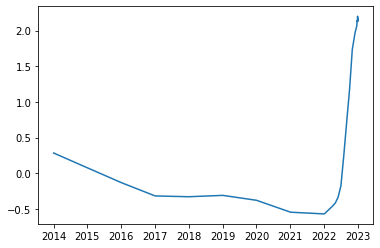

In [3]:

dic = {}
response = requests.get("https://www.euribor-rates.eu/pt/taxas-euribor-actuais/2/euribor-taxa-3-meses")
soup = BeautifulSoup(response.text,"html.parser")
a=soup.find("div",{"class":"card-body"})
for name in soup.find_all("tr"):
    cells = name.find_all("td")
    date= cells[0].text
    values = cells[1].text
    dic.update({date:values})
df = pd.DataFrame.from_dict(dic.items(), orient='columns')
df.columns = ['Date','Percentage']
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df['Percentage']=df['Percentage'].str.replace(",",".")
df['Percentage']=df['Percentage'].str.rstrip("%").astype(float)

print(f"The mean of last three months is: {df['Percentage'][::-1].tail(3).mean()}")

plt.plot(df["Date"], df["Percentage"])
